<a href="https://colab.research.google.com/github/RapaDewan/Machine-Learning/blob/main/FCC18_L4/FCC18_L4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

!pip install numpy pandas-profiling matplotlib plotly seaborn --quiet

In [5]:
!pip install opendatasets --upgrade --quiet

In [6]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
ross_df = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv.zip')

<ipython-input-8-201fb535fe63>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ross_df = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv.zip')


In [9]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [10]:
store_df = pd.read_csv('/content/drive/MyDrive/Datasets/store.csv')

In [11]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
merged_df=ross_df.merge(store_df, how='left', on='Store')

In [13]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [14]:
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/test.csv.zip')

In [15]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [16]:
merged_test_df=test_df.merge(store_df, how='left', on='Store')

In [17]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [19]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [20]:
merged_df.duplicated().sum()

0

In [21]:
merged_df['Date']= pd.to_datetime(merged_df.Date)

In [22]:
merged_test_df['Date']=pd.to_datetime(merged_test_df.Date)

In [23]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [24]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

<Axes: xlabel='Sales', ylabel='Count'>

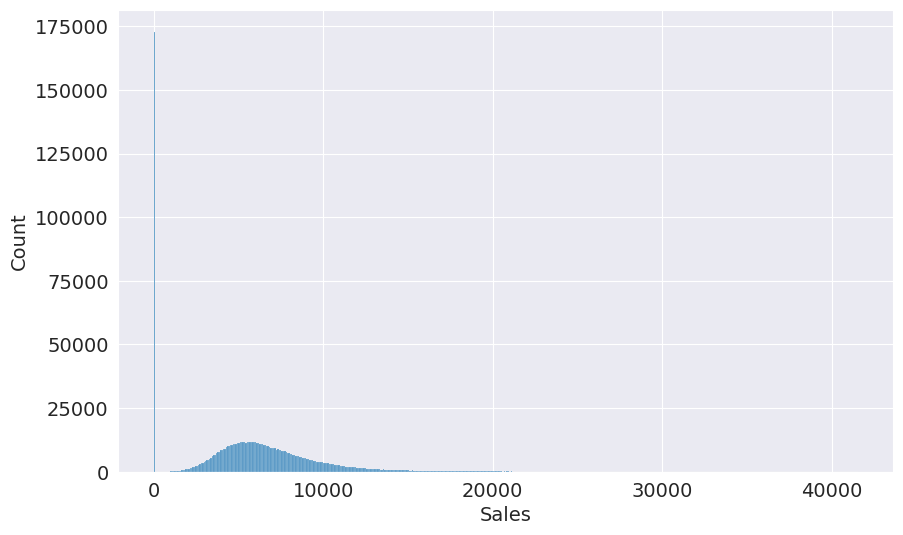

In [25]:
sns.histplot(data=merged_df, x='Sales')

In [26]:
merged_df.Open.value_counts()

,count
Open,
1,844392
0,172817


In [27]:
merged_df.Sales.value_counts()[0]

172871

In [28]:
merged_df.Sales.value_counts()

,count
Sales,
0,172871
5674,215
5558,197
5483,196
6214,195
...,...
23806,1
24183,1
20651,1


In [29]:
merged_df = merged_df[merged_df.Open==1].copy()

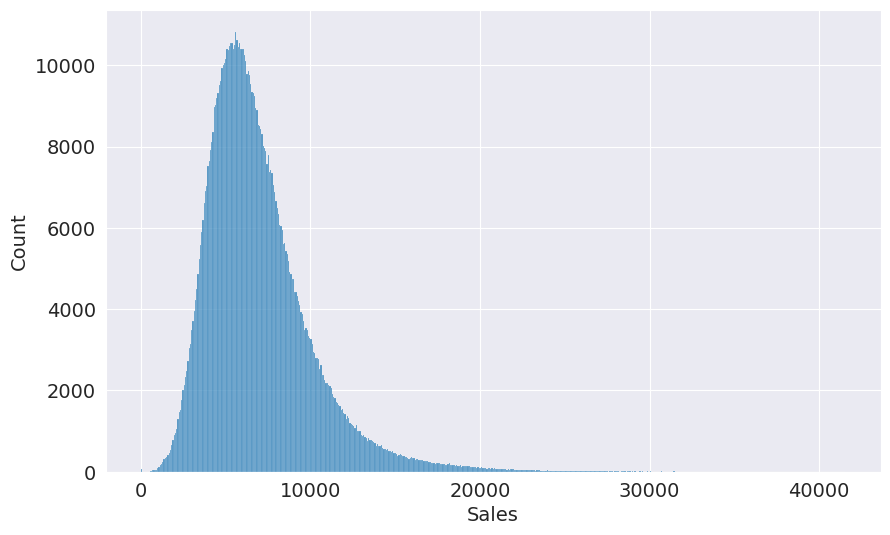

In [30]:
sns.histplot(data=merged_df, x='Sales');

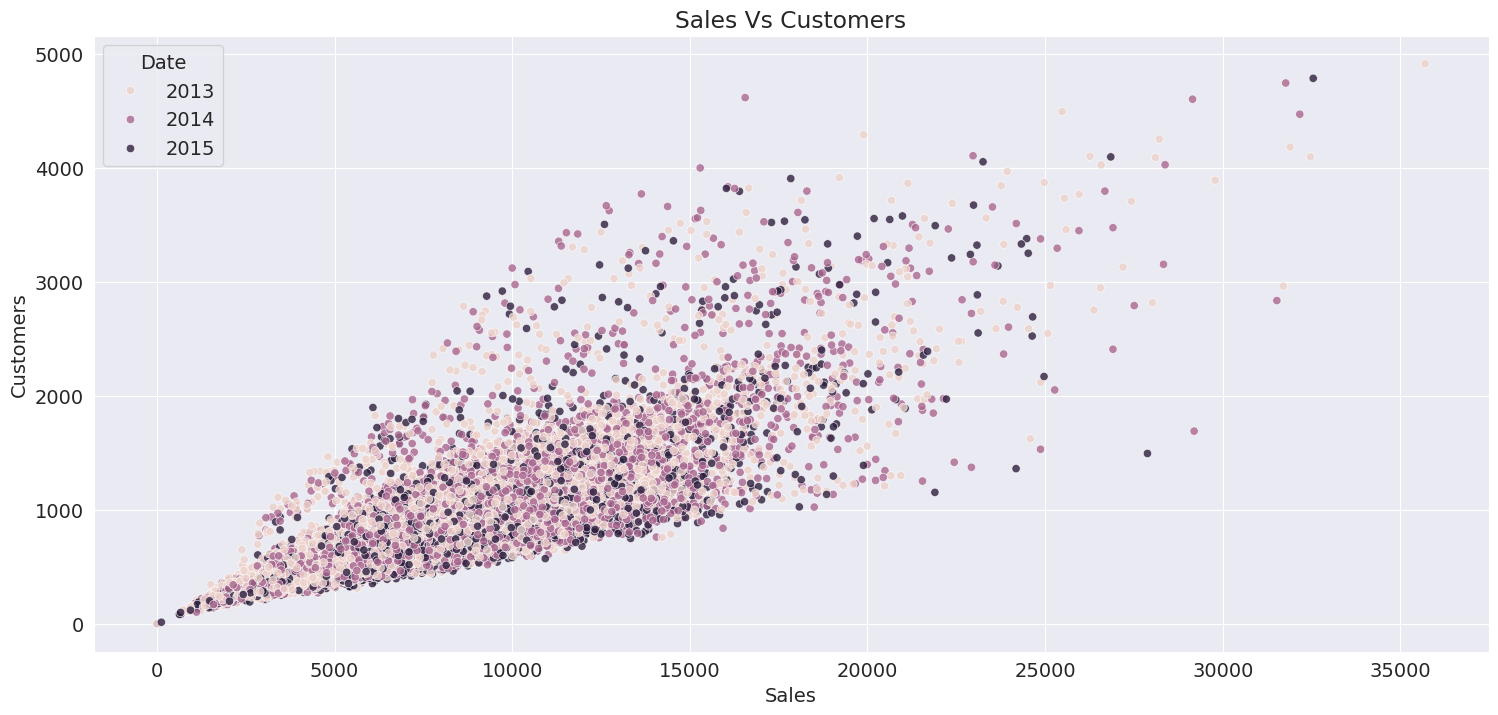

In [31]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()

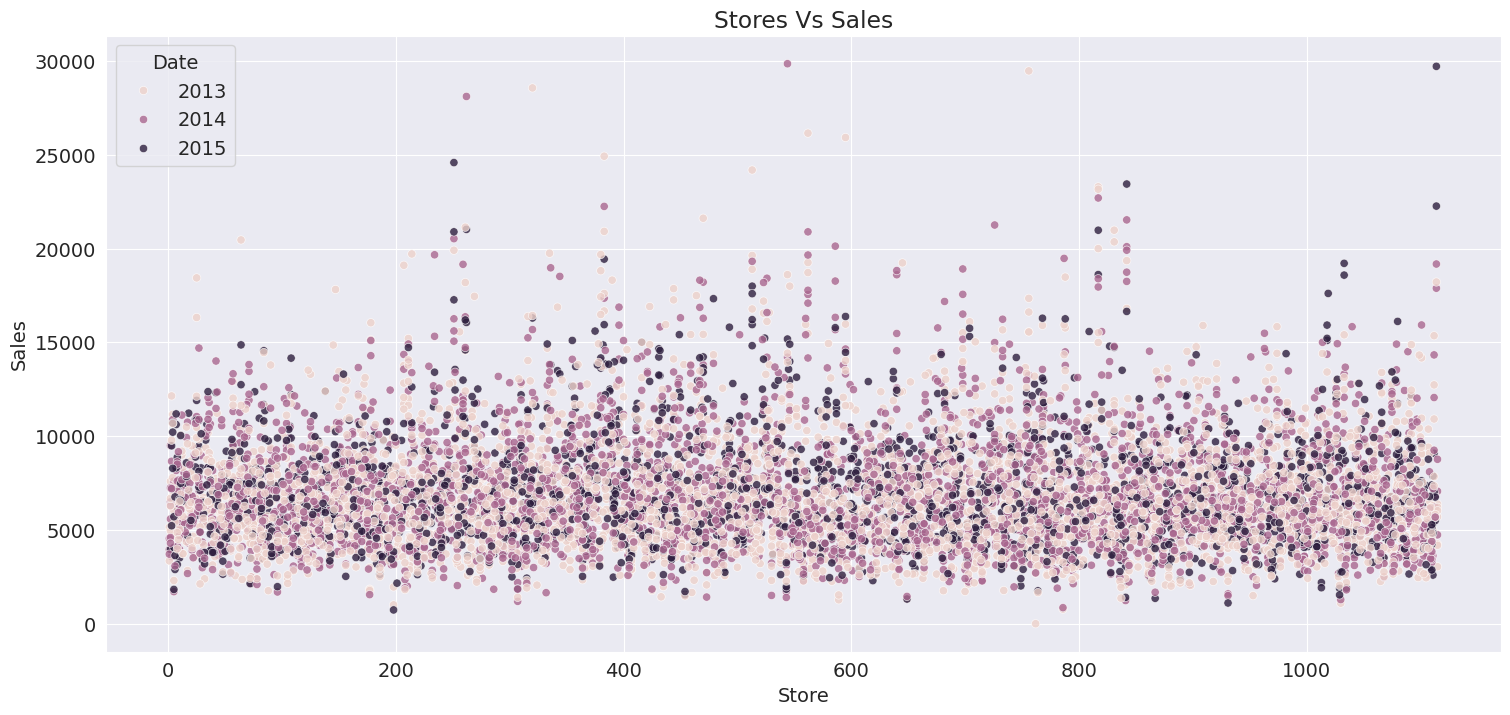

In [32]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Stores Vs Sales")
plt.show()

<ipython-input-33-7314db937790>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='DayOfWeek', y='Sales', palette='pastel')


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

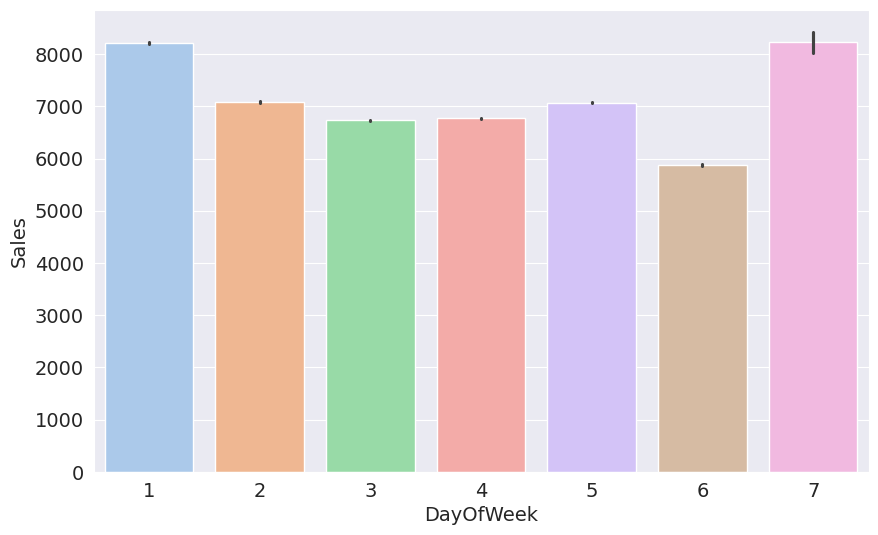

In [33]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales', palette='pastel')

<Axes: xlabel='Promo', ylabel='Sales'>

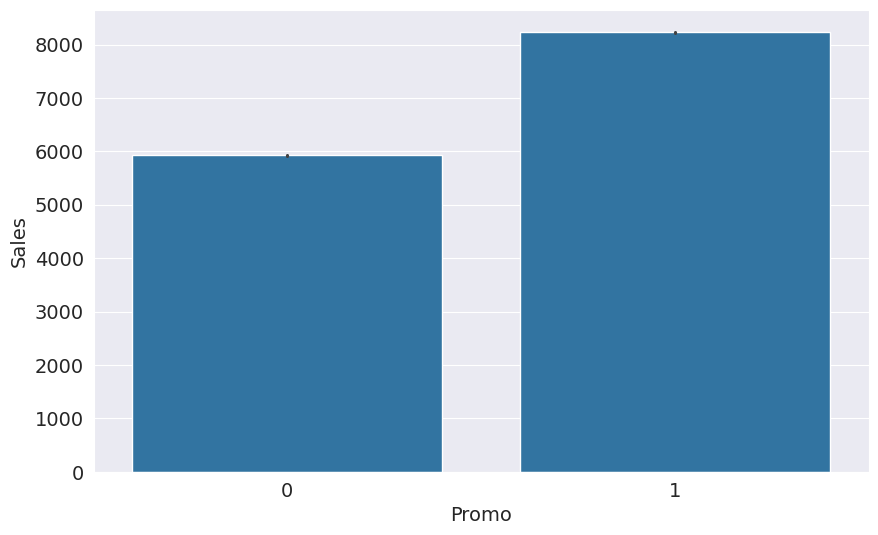

In [34]:
sns.barplot(data=merged_df, x='Promo', y='Sales')


In [35]:
#merged_df.corr()['Sales'].sort_values(ascending=False)

##Feature Engineering

In [36]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [37]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,150.0,9.0,2006.0,0,NaN,NaN,NaN,1,1,2013
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,860.0,10.0,1999.0,0,NaN,NaN,NaN,1,1,2013
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",1,1,2013
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,1430.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013


In [38]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [39]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

In [40]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,17,9,2015
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",17,9,2015
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,17,9,2015
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,17,9,2015
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,17,9,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,8,2015
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,1,8,2015
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,1,8,2015
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,1,8,2015


<Axes: xlabel='Year', ylabel='Sales'>

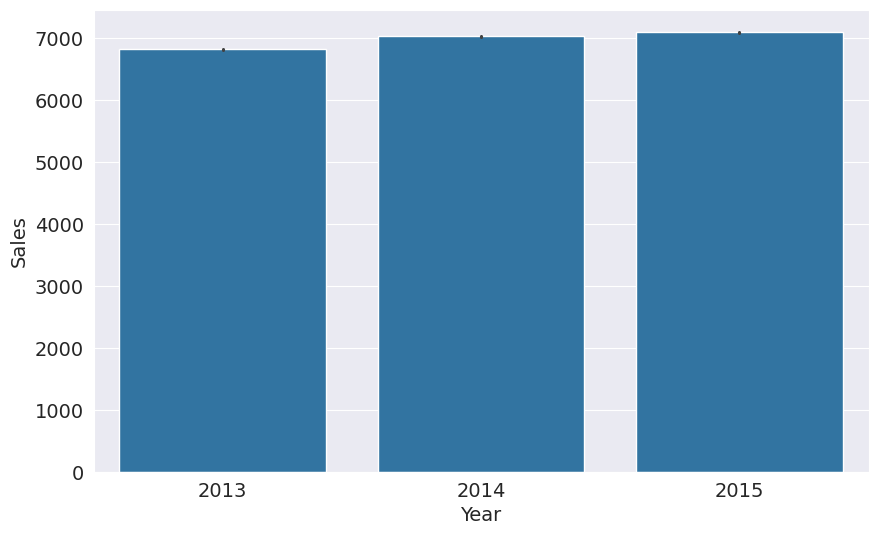

In [41]:
sns.barplot(data=merged_df, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

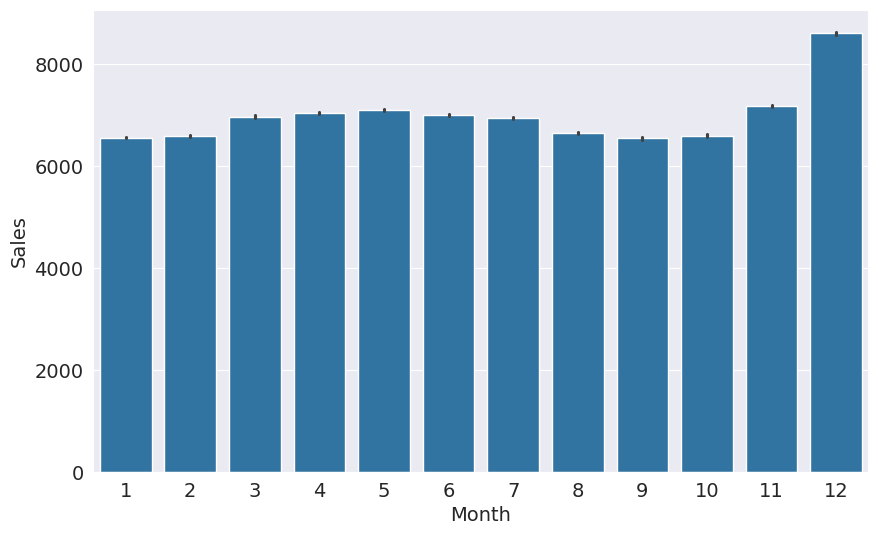

In [42]:
sns.barplot(data=merged_df, x='Month', y='Sales')


<Axes: xlabel='Day', ylabel='Sales'>

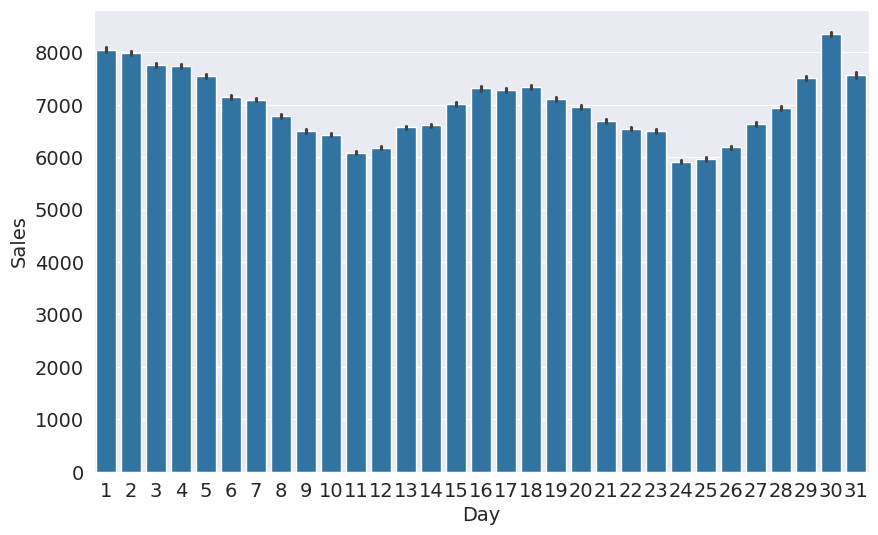

In [43]:
sns.barplot(data=merged_df, x='Day', y='Sales')


##Train/Test/Validation Split

In [44]:
len(merged_df)

844392

In [45]:
train_size=int(.75* len(merged_df))

In [46]:
train_size

633294

In [47]:
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [48]:
len(train_df), len (val_df)

(633294, 211098)

In [49]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [50]:
val_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
256637,751,3,2014-12-10,3720,533,1,0,0,0,a,...,650.0,10.0,2006.0,0,NaN,NaN,NaN,10,12,2014
256638,752,3,2014-12-10,4258,404,1,0,0,0,a,...,970.0,3.0,2013.0,1,31.0,2013.0,"Feb,May,Aug,Nov",10,12,2014
256639,753,3,2014-12-10,7170,654,1,0,0,0,d,...,540.0,11.0,2012.0,1,35.0,2010.0,"Mar,Jun,Sept,Dec",10,12,2014
256640,754,3,2014-12-10,7359,837,1,0,0,0,c,...,380.0,5.0,2008.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec",10,12,2014
256635,748,3,2014-12-10,4579,411,1,0,0,0,d,...,2380.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,745,5,2015-07-31,8363,746,1,1,0,1,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",31,7,2015
745,746,5,2015-07-31,9082,638,1,1,0,1,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",31,7,2015
746,747,5,2015-07-31,10708,826,1,1,0,1,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,31,7,2015
740,741,5,2015-07-31,11253,1137,1,1,0,1,d,...,11900.0,NaN,NaN,0,NaN,NaN,NaN,31,7,2015


In [51]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [52]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [53]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [54]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [55]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']

In [56]:
target_col = 'Sales'

In [57]:
merged_df[input_cols].nunique()

,0
Store,1115
DayOfWeek,7
Promo,2
StateHoliday,5
StoreType,4
Assortment,3
Day,31
Month,12
Year,3


In [58]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [59]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [60]:
test_inputs = merged_test_df[input_cols].copy()
# Test data does not have targets

In [61]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

##Imputation, Scaling and Encode


In [62]:
from sklearn.impute import SimpleImputer


In [63]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [64]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [67]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [68]:
from sklearn.preprocessing import OneHotEncoder

In [69]:
# encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
# encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [70]:
# Convert all specified categorical columns to strings
for col in categorical_cols:
    train_inputs[col] = train_inputs[col].astype(str)

# Now apply OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [71]:
# train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
# val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
# test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [72]:
# Reconvert categorical columns to ensure they are all strings
for col in categorical_cols:
    train_inputs[col] = train_inputs[col].astype(str)
    val_inputs[col] = val_inputs[col].astype(str)
    test_inputs[col] = test_inputs[col].astype(str)

# Apply OneHotEncoder transformation
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])


In [73]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

##Step 5 - Create quick & easy baseline models to benchmark future models

#Fixed/Random Guess


In [74]:
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

In [75]:
train_preds=return_mean(X_train)

In [76]:
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

In [77]:
from sklearn.metrics import mean_squared_error


In [78]:
mean_squared_error(train_preds, train_targets, squared=False)

3082.450443277419

In [79]:
mean_squared_error(return_mean(X_val), val_targets, squared=False)

3168.6033635047716

In [80]:
def guess_random(inputs):
    lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [81]:
train_preds = guess_random(X_train)
train_preds

array([ 3564.81895151,  1008.34679971,  2679.84760572, ...,
       19383.81527257,  6523.59117896,  1650.06240916])

In [82]:
mean_squared_error(train_preds, train_targets, squared=False)

18633.953024010174

In [83]:
mean_squared_error(guess_random(X_val), val_targets, squared=False)

18424.959856191243

##Baseline ML model


In [84]:
from sklearn.linear_model import LinearRegression


In [85]:
linreg=LinearRegression()

In [86]:
linreg.fit(X_train, train_targets)

LinearRegression()

In [87]:
train_preds=linreg.predict(X_train)
train_preds

array([ 7115. , 10581. ,  7036. , ...,  6243. ,  5999. ,  5618.5])

In [88]:
mean_squared_error(train_preds, train_targets, squared=False)

2741.5860353706703

In [89]:
val_preds=linreg.predict(X_val)
val_preds

array([5618.5, 5619. , 5999.5, ..., 8649. , 8404.5, 7844.5])

In [90]:
mean_squared_error(val_preds, val_targets, squared=False)

2817.656190781348

##Step 6 - Pick a strategy, train a model & tune hyperparameters

In [91]:
def try_model(model):

    model.fit(X_train, train_targets)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse

#Linear Models


In [92]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor


In [93]:
try_model(LinearRegression())

(2741.5860353706703, 2817.656190781348)

In [94]:
try_model(Ridge())

(2741.5871950814444, 2817.7784665409868)

In [95]:
%%time
try_model(Lasso())

CPU times: user 12.5 s, sys: 263 ms, total: 12.8 s
Wall time: 7.58 s


(2741.7143904640566, 2817.9472924045217)

In [96]:
try_model(SGDRegressor())

(2741.939252032712, 2815.0358951542366)

#Tree Based Models


In [97]:
from sklearn.tree import DecisionTreeRegressor, plot_tree


In [98]:
tree=DecisionTreeRegressor(random_state=42)
try_model(tree)

(0.0, 1559.7378600480247)

[Text(0.5, 0.9, 'Promo_0 <= 0.5\nsquared_error = 9494721.741\nsamples = 633294\nvalue = 6873.18'),
 Text(0.25, 0.7, 'DayOfWeek_1 <= 0.5\nsquared_error = 10053046.41\nsamples = 280741\nvalue = 8160.121'),
 Text(0.125, 0.5, 'Month <= 0.955\nsquared_error = 8559596.144\nsamples = 223344\nvalue = 7757.247'),
 Text(0.0625, 0.3, 'StoreType_b <= 0.5\nsquared_error = 7967330.328\nsamples = 210684\nvalue = 7631.861'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Day <= 0.35\nsquared_error = 13800173.481\nsamples = 12660\nvalue = 9843.895'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Month <= 0.955\nsquared_error = 12775230.673\nsamples = 57397\nvalue = 9727.788'),
 Text(0.3125, 0.3, 'Day <= 0.95\nsquared_error = 11907411.6\nsamples = 54232\nvalue = 9578.715'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Day <= 0.267\nsquared_error = 20739758.

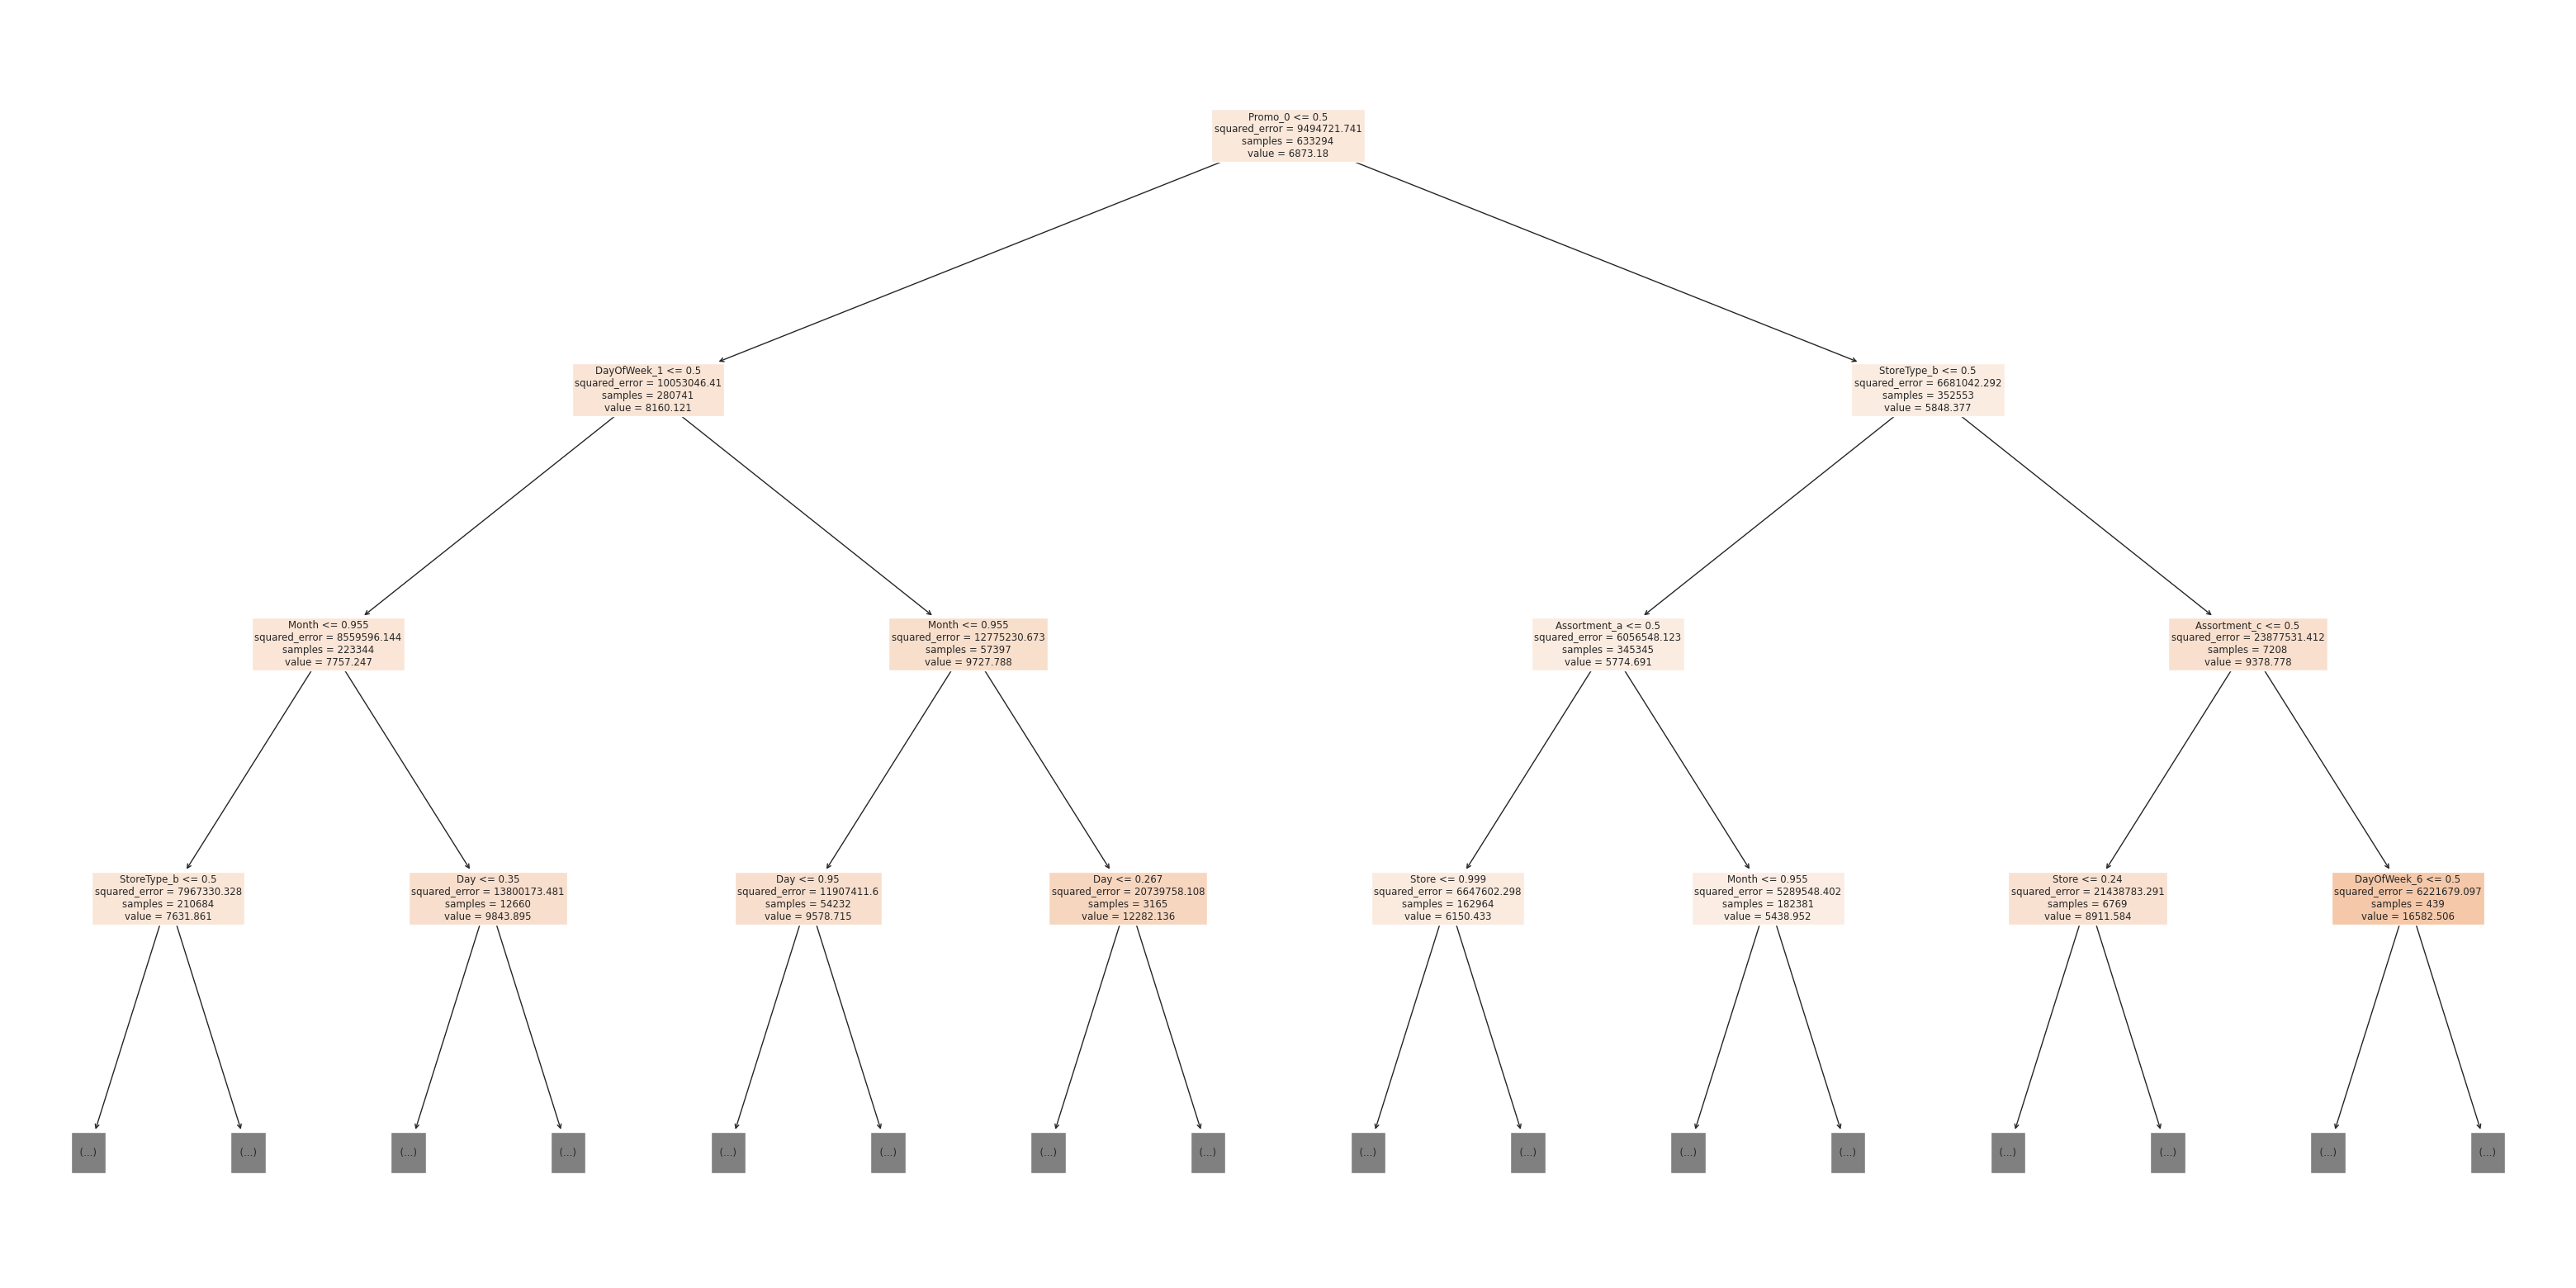

In [108]:
plt.figure(figsize=(40,20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols)

#Random Forest

In [109]:
from sklearn.ensemble import RandomForestRegressor


In [110]:
rf=RandomForestRegressor(random_state=42, n_jobs=-1)
# try_model(rf)

##Step 7 - Experiment and combine results from multiple strategies


In [111]:
#theory

##Step 8 - Interpret models, study individual predictions & present your findings

#Feature Importance


In [112]:
rf.fit(X_train, train_targets)

rf.feature_importances_

array([6.07412101e-01, 4.88393196e-02, 4.71254150e-02, 9.30282826e-03,
       3.36941035e-02, 4.40591456e-03, 2.43735761e-03, 2.11467096e-03,
       5.71418981e-03, 6.96554452e-03, 4.47739863e-03, 5.83469269e-02,
       8.05201285e-02, 1.18767484e-03, 2.11472202e-04, 2.45172539e-05,
       1.88388455e-05, 1.38995265e-02, 2.25678813e-02, 1.04169805e-02,
       1.39945667e-02, 8.34303630e-03, 5.50125164e-03, 1.24783549e-02])

In [115]:
importance_df = pd.DataFrame({
    'feature': numeric_cols+encoded_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
0,Store,0.607412
12,Promo_1,0.080520
11,Promo_0,0.058347
1,Day,0.048839
2,Month,0.047125
4,DayOfWeek_1,0.033694
18,StoreType_b,0.022568
20,StoreType_d,0.013995
17,StoreType_a,0.013900
23,Assortment_c,0.012478


<Axes: xlabel='importance', ylabel='feature'>

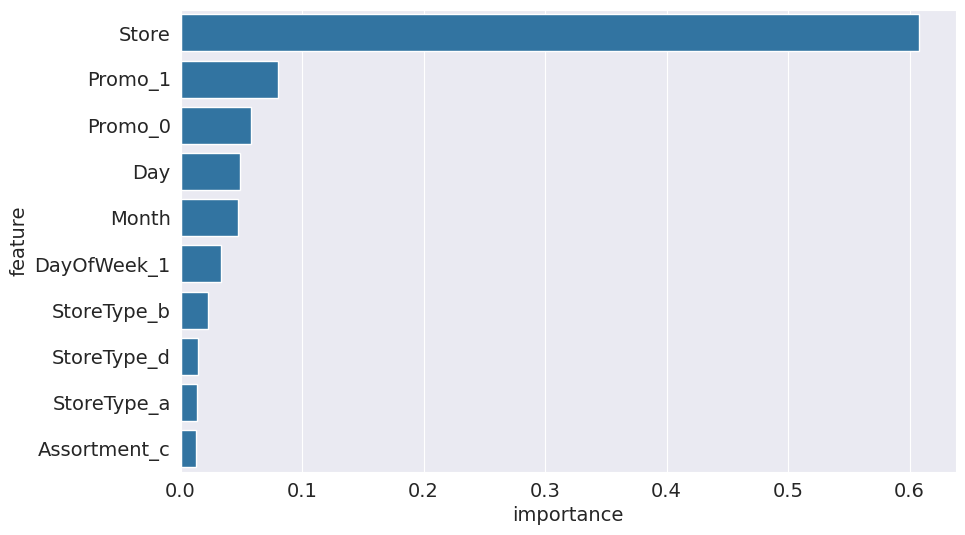

In [122]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

#Looking at individual predictions


In [128]:
def predict_input(model, single_input):
    if single_input['Open'] == 0:
        return 0.0

    # Convert single input to DataFrame
    input_df = pd.DataFrame([single_input])

    # Convert 'Date' to datetime
    input_df['Date'] = pd.to_datetime(input_df['Date'])

    # Extract day, month, year from 'Date'
    input_df['Day'] = input_df['Date'].dt.day
    input_df['Month'] = input_df['Date'].dt.month
    input_df['Year'] = input_df['Date'].dt.year

    # Ensure numeric columns are of numeric type
    input_df[numeric_cols] = input_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Handle missing values with imputer
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])

    # Scale numeric columns
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])

    # Ensure categorical columns are of string type
    input_df[categorical_cols] = input_df[categorical_cols].astype(str)

    # Encode categorical columns
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])

    # Combine numeric and encoded features
    X_input = input_df[numeric_cols + encoded_cols]

    # Make prediction
    pred = model.predict(X_input)[0]

    return pred


In [129]:
sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

sample_input

{'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [130]:
predict_input(rf, sample_input)

4258.01